# ML & DL Registration / Referral ID:AIRSS1190 Full Name: Mahesh Balaram Madhvi College Name: K.J.Somaiya College of Engineering 

# Assignment 7

## Question 1

#### Implement gradient descent (for simple linear regression) from scratch. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter("ignore")

In [2]:
data = pd.read_csv('Salary_Data1.csv')
data.head(10)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [3]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,1].values

In [4]:
class LinearRegression() :
    
    def __init__(self , learning_rate , iterations) :
        
        self.learning_rate = learning_rate
        
        self.iterations = iterations
        
    def fit(self , X , Y) :
        
        self.m, self.n = X.shape
        
        self.W = np.zeros(self.n)
        
        self.b = 0
        
        self.X = X
        
        self.Y = Y
        
        
        # gradient descent learning

        for i in range(self.iterations) :
    
            self.update_weights()
    
        return self
    
    def update_weights(self) :
        
        Y_pred = self.predict(self.X)
        
        # calculate gradients
        
        dW = -( 2 * (self.X.T).dot(self.Y - Y_pred )) / self.m
        
        db = - 2 * np.sum(self.Y - Y_pred ) / self.m
        
        # update weights
        
        self.W = self.W - self.learning_rate * dW
        
        self.b = self.b - self.learning_rate * db
        
        return self
    def predict(self , X) :
            
            return X.dot(self.W) + self.b

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 1/3, random_state = 0 )

In [6]:
model = LinearRegression( iterations = 1000, learning_rate = 0.01 )
model.fit( X_train, Y_train )

In [7]:
Y_pred = model.predict( X_test )
print( "Predicted values ", np.round( Y_pred[:3], 2 ) ) 
print( "Real values      ", Y_test[:3] )
print( "Trained W        ", round( model.W[0], 2 ) )
print( "Trained b        ", round( model.b, 2 ) )

Predicted values  [ 40594.69 123305.18  65031.88]
Real values       [ 37731 122391  57081]
Trained W         9398.92
Trained b         26496.31


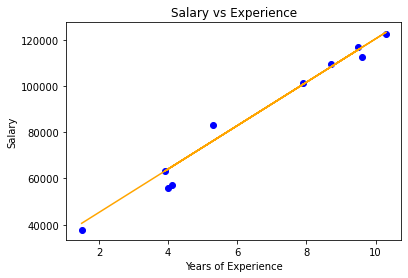

In [8]:
plt.scatter( X_test, Y_test, color = 'blue' )
plt.plot( X_test, Y_pred, color = 'orange' )
plt.title( 'Salary vs Experience' )
plt.xlabel( 'Years of Experience' )
plt.ylabel( 'Salary' )
plt.show()

# Question 2

### Kaggle Competition: House Prices Prediction - Advanced Regression Techniques

In [9]:
train_data = pd.read_csv('train2.csv')
test_data = pd.read_csv('test2.csv')

In [10]:
sol = test_data['Id']

In [11]:
train_data.shape

(1460, 81)

In [12]:
test_data.shape

(1459, 80)

In [13]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


##### Handelling null and duplicate values

In [14]:
train_data.duplicated().sum()

0

In [15]:
train_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [16]:
train_data.drop('PoolQC', axis = 1, inplace = True)
test_data.drop('PoolQC', axis = 1, inplace = True)
train_data.drop('Fence', axis = 1, inplace = True)
test_data.drop('Fence', axis = 1, inplace = True)
train_data.drop('MiscFeature', axis = 1, inplace = True)
test_data.drop('MiscFeature', axis = 1, inplace = True)
train_data.drop('Alley', axis = 1, inplace = True)
test_data.drop('Alley', axis = 1, inplace = True)

In [17]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [18]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


In [19]:
train_data['LotFrontage'].replace(np.nan, train_data['LotFrontage'].mean(), inplace = True)
train_data['MasVnrType'].replace(np.nan, train_data['MasVnrType'].mode()[0], inplace = True)
train_data['MasVnrArea'].replace(np.nan, train_data['MasVnrArea'].mode()[0], inplace = True)
train_data['BsmtQual'].replace(np.nan, train_data['BsmtQual'].mode()[0], inplace = True)
train_data['BsmtCond'].replace(np.nan, train_data['BsmtCond'].mode()[0], inplace = True)
train_data['BsmtExposure'].replace(np.nan, train_data['BsmtExposure'].mode()[0], inplace = True)
train_data['BsmtFinType1'].replace(np.nan, train_data['BsmtFinType1'].mode()[0], inplace = True)
train_data['BsmtFinType2'].replace(np.nan, train_data['BsmtFinType2'].mode()[0], inplace = True)
train_data['FireplaceQu'].replace(np.nan, train_data['FireplaceQu'].mode()[0], inplace = True)
train_data['GarageType'].replace(np.nan, train_data['GarageType'].mode()[0], inplace = True)
train_data['GarageYrBlt'].replace(np.nan, train_data['GarageYrBlt'].mean(), inplace = True)
train_data['GarageFinish'].replace(np.nan, train_data['GarageFinish'].mode()[0], inplace = True)
train_data['GarageQual'].replace(np.nan, train_data['GarageQual'].mode()[0], inplace = True)
train_data['GarageCond'].replace(np.nan, train_data['GarageCond'].mode()[0], inplace = True)
train_data['Electrical'].replace(np.nan, train_data['Electrical'].mode()[0], inplace = True)

In [20]:
test_data['LotFrontage'].replace(np.nan, test_data['LotFrontage'].mean(), inplace = True)
test_data['MasVnrType'].replace(np.nan, test_data['MasVnrType'].mode()[0], inplace = True)
test_data['MasVnrArea'].replace(np.nan, test_data['MasVnrArea'].mode()[0], inplace = True)
test_data['BsmtQual'].replace(np.nan, test_data['BsmtQual'].mode()[0], inplace = True)
test_data['BsmtCond'].replace(np.nan, test_data['BsmtCond'].mode()[0], inplace = True)
test_data['BsmtExposure'].replace(np.nan, test_data['BsmtExposure'].mode()[0], inplace = True)
test_data['BsmtFinType1'].replace(np.nan, test_data['BsmtFinType1'].mode()[0], inplace = True)
test_data['BsmtFinType2'].replace(np.nan, test_data['BsmtFinType2'].mode()[0], inplace = True)
test_data['FireplaceQu'].replace(np.nan, test_data['FireplaceQu'].mode()[0], inplace = True)
test_data['GarageType'].replace(np.nan, test_data['GarageType'].mode()[0], inplace = True)
test_data['GarageYrBlt'].replace(np.nan, test_data['GarageYrBlt'].mean(), inplace = True)
test_data['GarageFinish'].replace(np.nan, test_data['GarageFinish'].mode()[0], inplace = True)
test_data['GarageQual'].replace(np.nan, test_data['GarageQual'].mode()[0], inplace = True)
test_data['GarageCond'].replace(np.nan, test_data['GarageCond'].mode()[0], inplace = True)
test_data['Electrical'].replace(np.nan, test_data['Electrical'].mode()[0], inplace = True)

In [21]:
test_data.fillna(0, inplace = True)
test_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 76, dtype: int64

In [22]:
train_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

### Getting statistical insights

In [23]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Graphical Analysis 

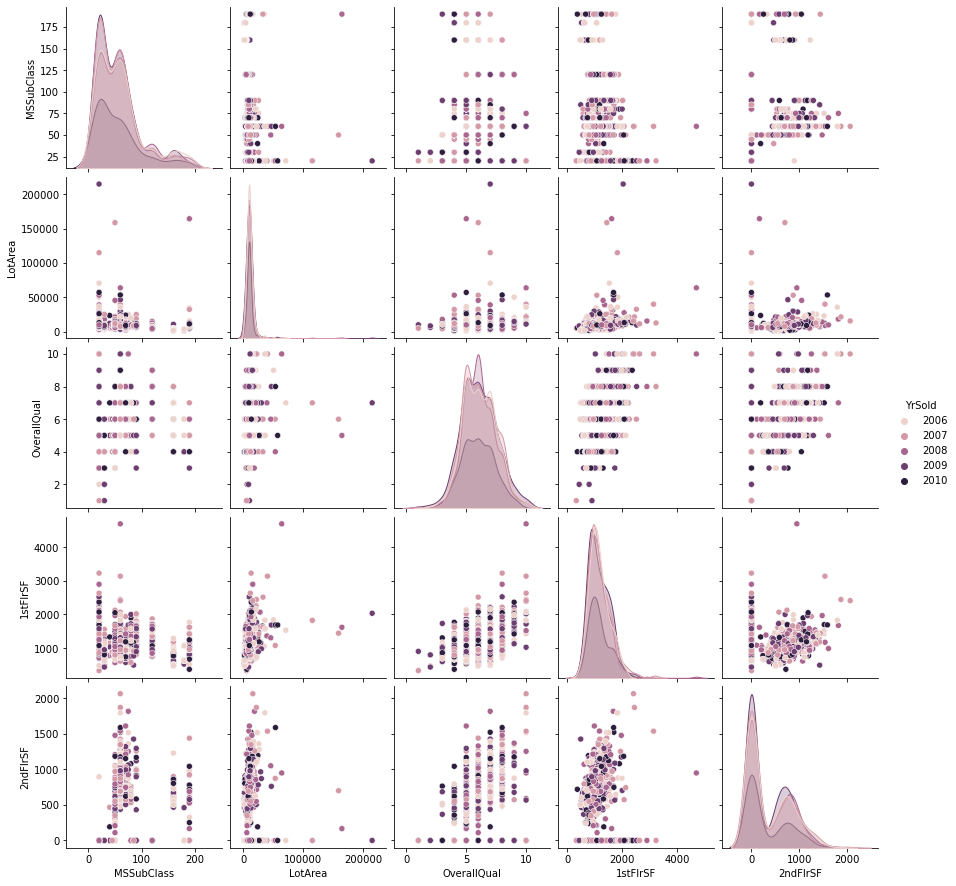

In [24]:
sns.pairplot(data = train_data , vars = ['MSSubClass', 'LotArea', 'OverallQual', '1stFlrSF', '2ndFlrSF'], hue = 'YrSold')

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

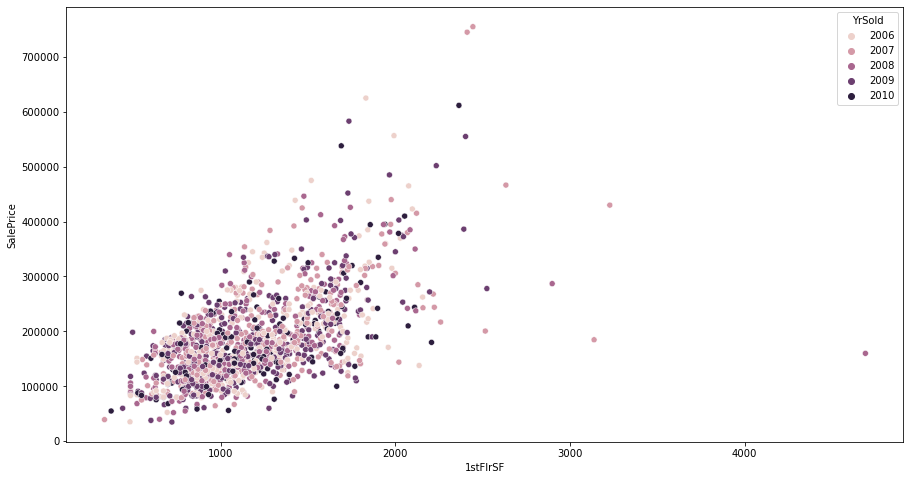

In [25]:
plt.figure(figsize = (15, 8))
sns.scatterplot(x = '1stFlrSF', y = 'SalePrice', hue = 'YrSold', data = train_data)

<AxesSubplot:xlabel='2ndFlrSF', ylabel='SalePrice'>

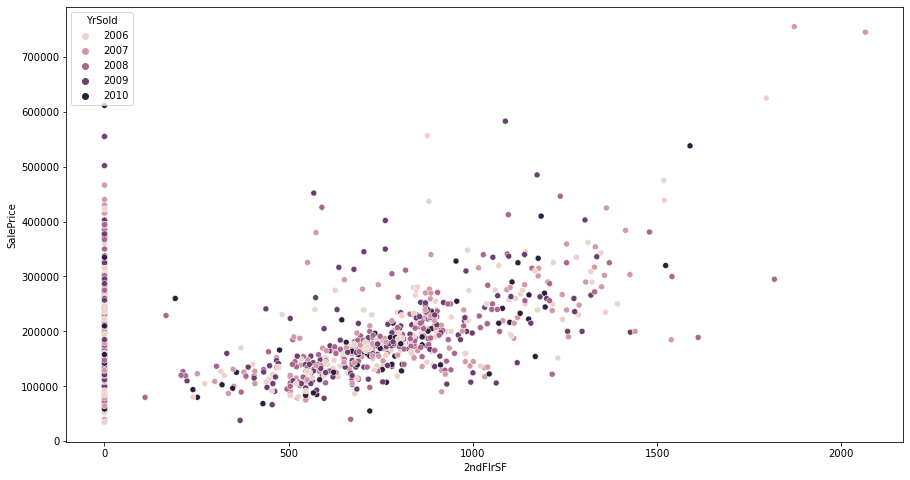

In [26]:
plt.figure(figsize = (15, 8))
sns.scatterplot(x = '2ndFlrSF', y = 'SalePrice', hue = 'YrSold', data = train_data)

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

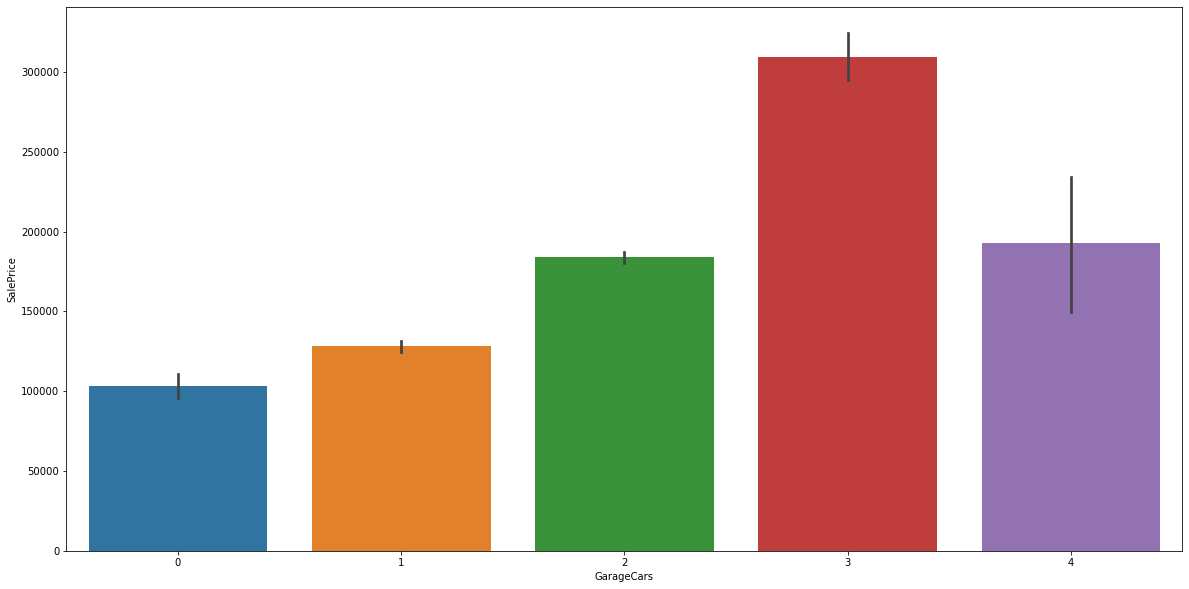

In [27]:
plt.figure(figsize = (20, 10))
sns.barplot(train_data['GarageCars'], train_data['SalePrice'])

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

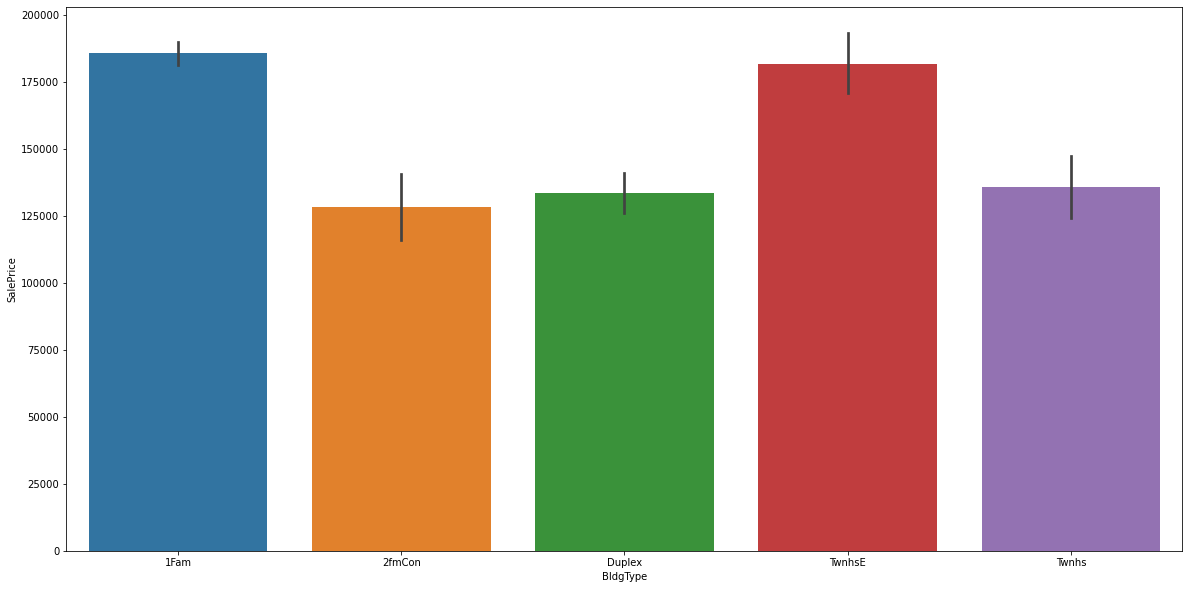

In [28]:
plt.figure(figsize = (20, 10))
sns.barplot(train_data['BldgType'], train_data['SalePrice'])

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

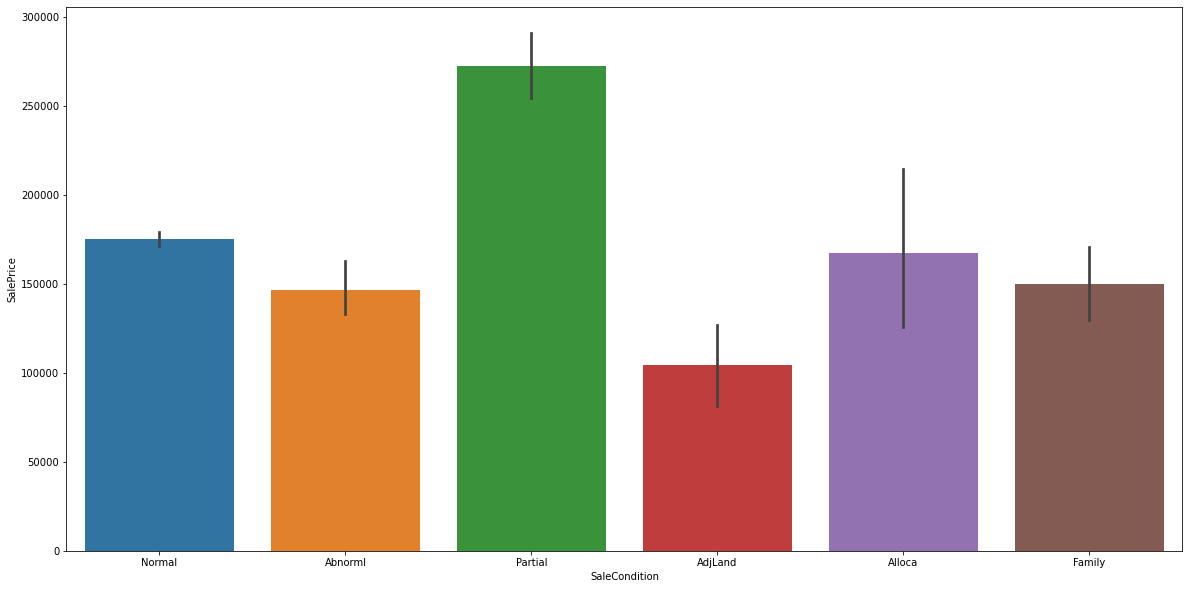

In [29]:
plt.figure(figsize = (20, 10))
sns.barplot(train_data['SaleCondition'], train_data['SalePrice'])

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

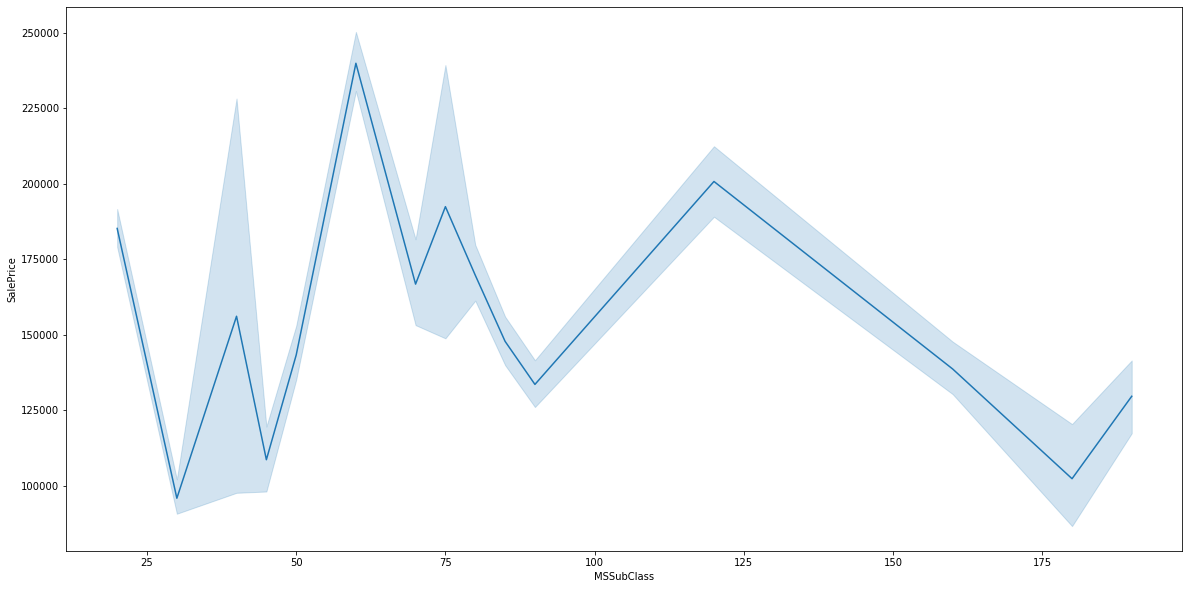

In [30]:
plt.figure(figsize = (20, 10))
sns.lineplot(x = 'MSSubClass', y = 'SalePrice', dashes = False, data = train_data)

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

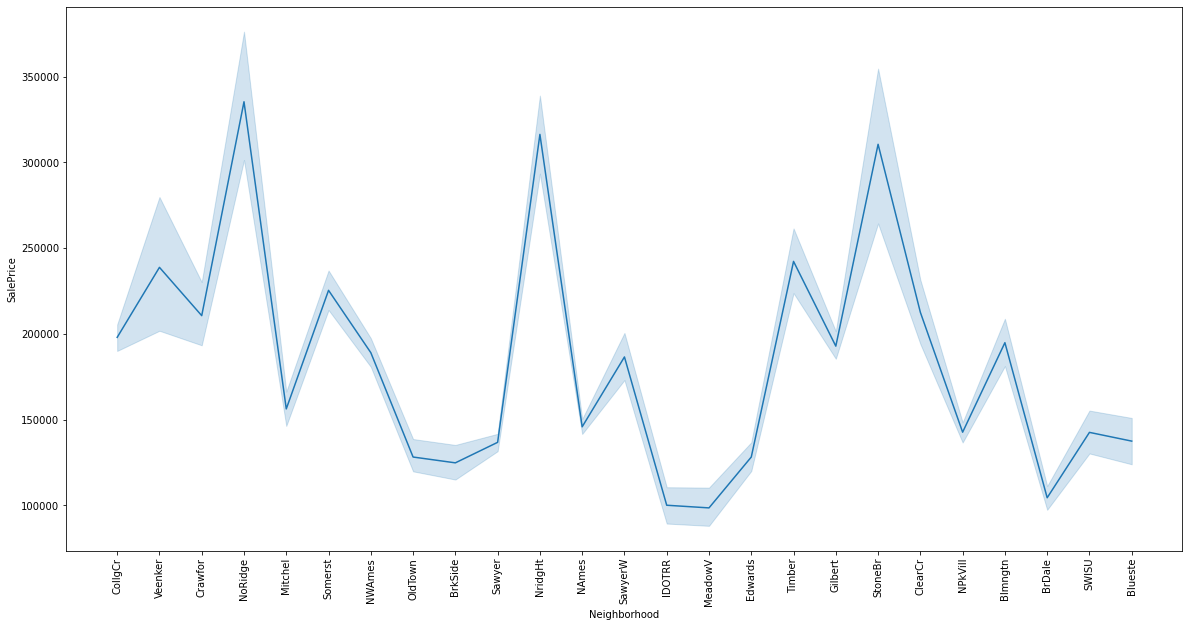

In [31]:
plt.figure(figsize = (20, 10))
plt.xticks(rotation = 90)
sns.lineplot(x = 'Neighborhood', y = 'SalePrice', dashes = False, data = train_data)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

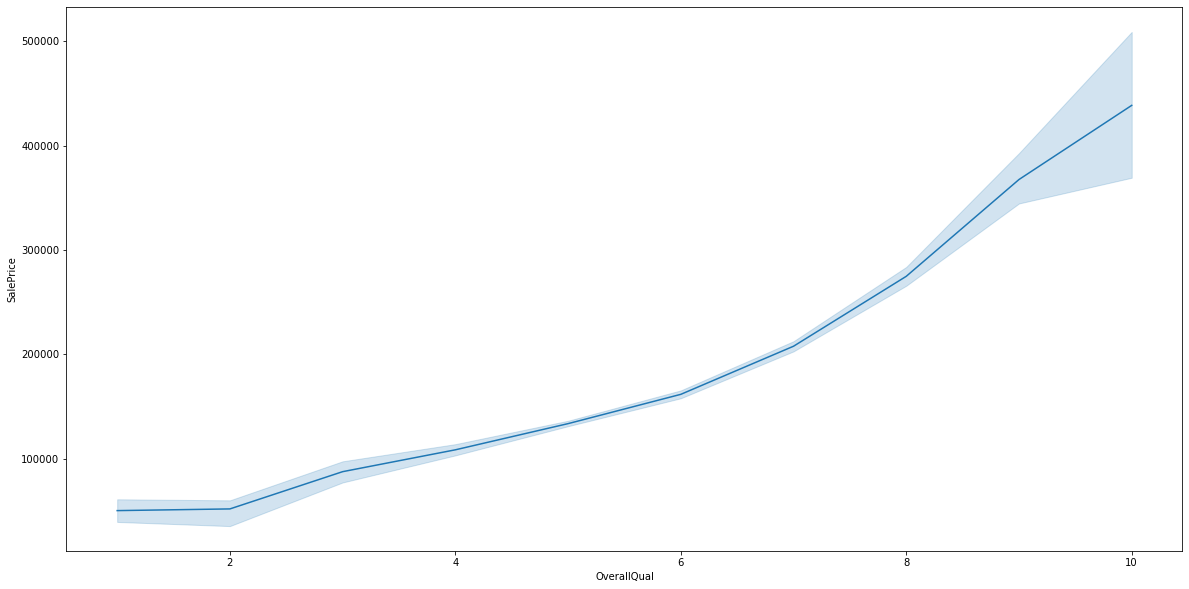

In [32]:
plt.figure(figsize = (20, 10))
sns.lineplot(x = 'OverallQual', y = 'SalePrice', dashes = False, data = train_data)

<AxesSubplot:xlabel='BldgType', ylabel='count'>

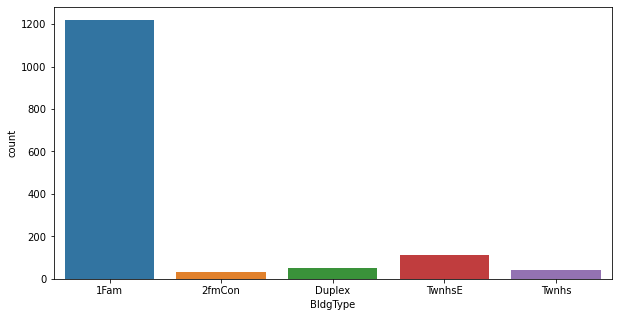

In [33]:
plt.figure(figsize = (10, 5))
sns.countplot('BldgType', data = train_data)

<AxesSubplot:xlabel='YearBuilt', ylabel='count'>

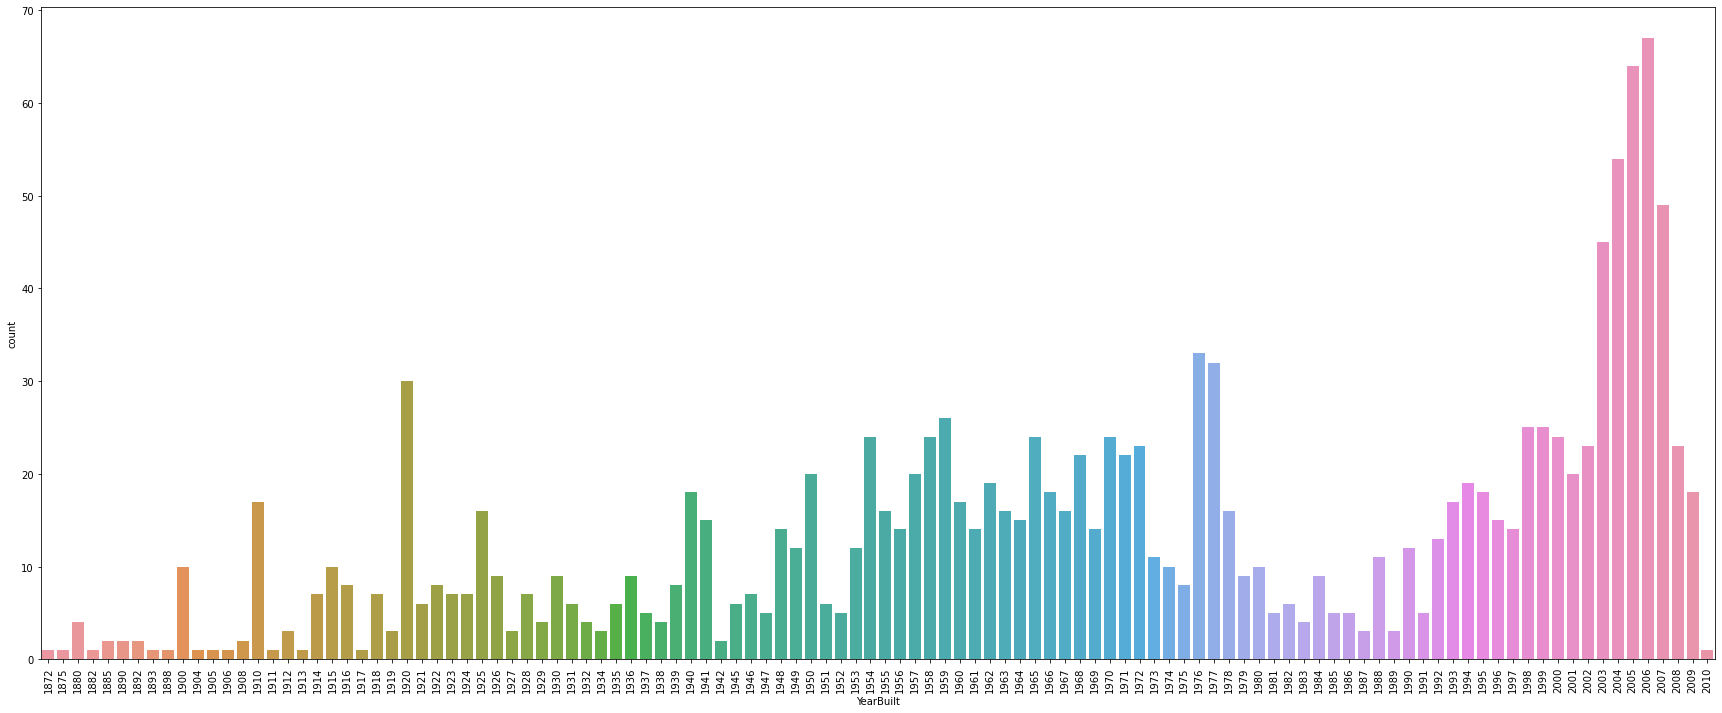

In [34]:
plt.figure(figsize = (30, 12))
plt.xticks(rotation = 90)
sns.countplot('YearBuilt', data = train_data)

## Data preprocessing. 

In [35]:
cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 
        'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
        'BsmtFullBath','BsmtHalfBath','FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
        'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'EnclosedPorch', 'OpenPorchSF', '3SsnPorch', 
        'PoolArea', 'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold',
        'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle','RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
        'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
        'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual','Functional', 'FireplaceQu', 
        'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
X_train = train_data[cols]
Y_train = train_data[['SalePrice']]

#### Applying StandardScalar() on numeric data columns

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 
        'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
        'BsmtFullBath','BsmtHalfBath','FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
        'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'EnclosedPorch', 'OpenPorchSF', '3SsnPorch', 
         'PoolArea', 'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold']
X_train[cols] = sc.fit_transform(X_train[cols])

#### Applying OrdinalEncoder() on remaining data columns 

In [37]:
from sklearn.preprocessing import OrdinalEncoder
oc = OrdinalEncoder()
cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle','RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
        'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
        'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual','Functional', 'FireplaceQu', 
        'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
X_train[cols] = oc.fit_transform(X_train[cols])

In [38]:
X_train.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,0.073375,-2.293718e-01,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,2.0,6.0,2.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
1,-0.872563,4.519361e-01,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,3.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
2,0.073375,-9.311018e-02,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,2.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
3,0.309859,-4.564744e-01,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,2.0,6.0,2.0,5.0,2.0,4.0,4.0,2.0,8.0,0.0
4,0.073375,6.336182e-01,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,2.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
5,-0.163109,6.790387e-01,0.360616,-0.795151,-0.517200,0.719786,0.491040,-0.570750,0.632450,-0.288653,...,3.0,6.0,2.0,1.0,2.0,4.0,4.0,2.0,8.0,4.0
6,-0.872563,2.248335e-01,-0.043379,1.374795,-0.517200,1.084115,0.975575,0.458754,2.029558,-0.288653,...,2.0,6.0,2.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
7,0.073375,6.454645e-16,-0.013513,0.651479,0.381743,0.057371,-0.574938,0.757643,0.910994,-0.090220,...,3.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
8,-0.163109,-8.652591e-01,-0.440659,0.651479,-0.517200,-1.333700,-1.689368,-0.570750,-0.973018,-0.288653,...,3.0,2.0,4.0,5.0,2.0,1.0,4.0,2.0,8.0,0.0
9,3.147673,-9.106796e-01,-0.310370,-0.795151,0.381743,-1.068734,-1.689368,-0.570750,0.893448,-0.288653,...,3.0,6.0,4.0,1.0,1.0,2.0,4.0,2.0,8.0,4.0


In [39]:
## Applying Linear regression
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
classifier.fit(X_train, Y_train)

LinearRegression()

In [40]:
result = classifier.predict(X_train)

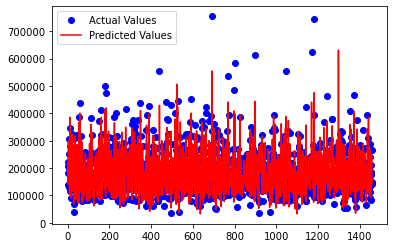

In [41]:
##Plot for Actual Values and Predicted Values
plt.figure(figsize = (6,4))
plt.plot(Y_train, 'o',color = 'blue', label = 'Actual Values')
plt.plot(result, color = 'red', label = 'Predicted Values')
plt.legend()

In [42]:
### Creating DataFrame for storying result.
l1 = list(sol)
l2 = list(result)
df = pd.DataFrame(list(zip(l1,l2)),columns=['Id','SalePrice'])
df.head()

,Id,SalePrice
0,1461,[219290.7487552088]
1,1462,[200411.07696653306]
2,1463,[222233.89507556186]
3,1464,[141078.46087767946]
4,1465,[294544.9888396086]


In [43]:
df['SalePrice'] = df['SalePrice'].astype(float)

In [44]:
df.head()

,Id,SalePrice
0,1461,219290.748755
1,1462,200411.076967
2,1463,222233.895076
3,1464,141078.460878
4,1465,294544.988840


In [45]:
## Saving our data to CSV file
df.to_csv('mySubmission.csv',index = False)